## Data Analysis for Audio Annotations

This Jupyter Notebook performs a data analysis on the `audio_annotations.csv` dataset. The dataset includes information about audio files, recorders, dates, times, audio durations, start and end times, and species.

### Visualizations Included

1. **Number of Audio Files by Recorder**: A bar chart showing the distribution of audio files among different recorders.

2. **Frequency of Species**: A bar chart displaying the frequency of each species in the dataset.

3. **Distribution of Audio Durations**: A histogram illustrating the distribution of audio durations.

4. **Time of Recordings**: A line chart showing the number of audio files recorded at different times of the day.

5. **Date of Recordings**: A line chart indicating the number of audio files recorded on different dates.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re # case sensitive
import os

In [2]:
ROOT_PATH = "../../../desarrollo/"

input_file = ROOT_PATH + "Data/Annotations/" + "audio_annotations.csv"
output_file = ROOT_PATH + "Data/Annotations/" + "audio_annotations.csv"

# Copy inputfile as outputfile
# os.system("cp " + input_file + " " + output_file)

input_file = output_file

In [3]:
# Read the CSV file
df = pd.read_csv(input_file)

In [4]:
print(len(df))

# Print count of unique paths
print(len(df["path"].unique()))

5778
471


## Number of Audio Files by Recorder

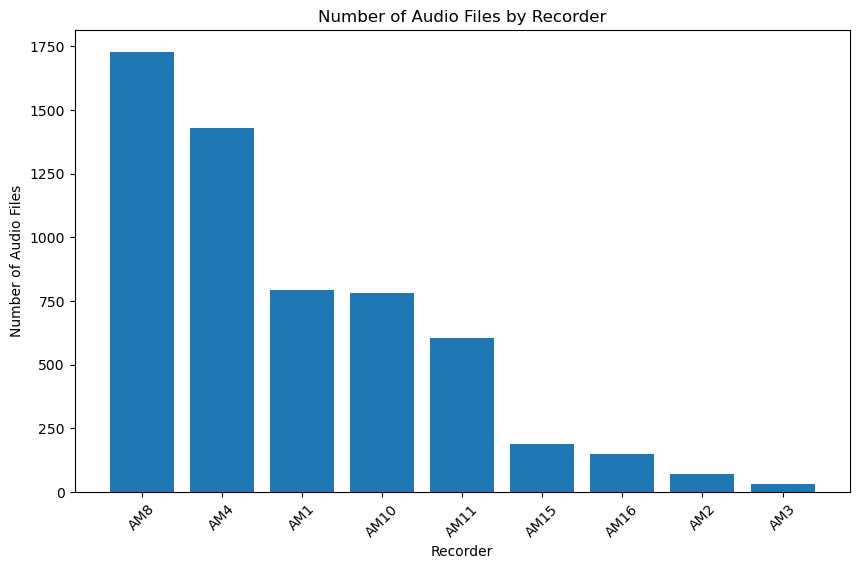

In [5]:
# Count the number of audio files by recorder
recorder_counts = df['recorder'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(recorder_counts.index, recorder_counts.values)
plt.xlabel('Recorder')
plt.ylabel('Number of Audio Files')
plt.title('Number of Audio Files by Recorder')
plt.xticks(rotation=45)
plt.show()

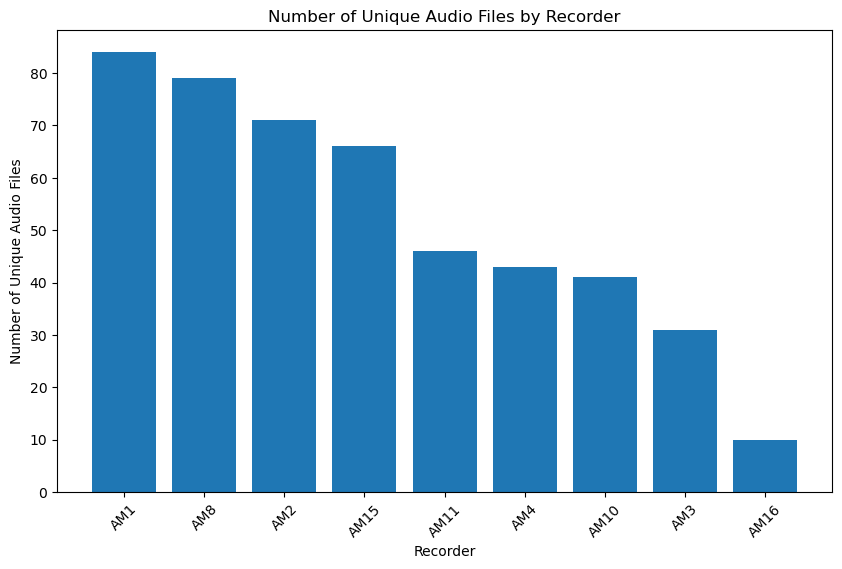

In [6]:
# Show the number of unique audio files by recorder in a plot
recorder_counts = df.groupby('recorder')['path'].nunique()

# Order the recorders by the number of unique audio files
recorder_counts = recorder_counts.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(recorder_counts.index, recorder_counts.values)
plt.xlabel('Recorder')
plt.ylabel('Number of Unique Audio Files')
plt.title('Number of Unique Audio Files by Recorder')
plt.xticks(rotation=45)
plt.show()


## Frequency of species

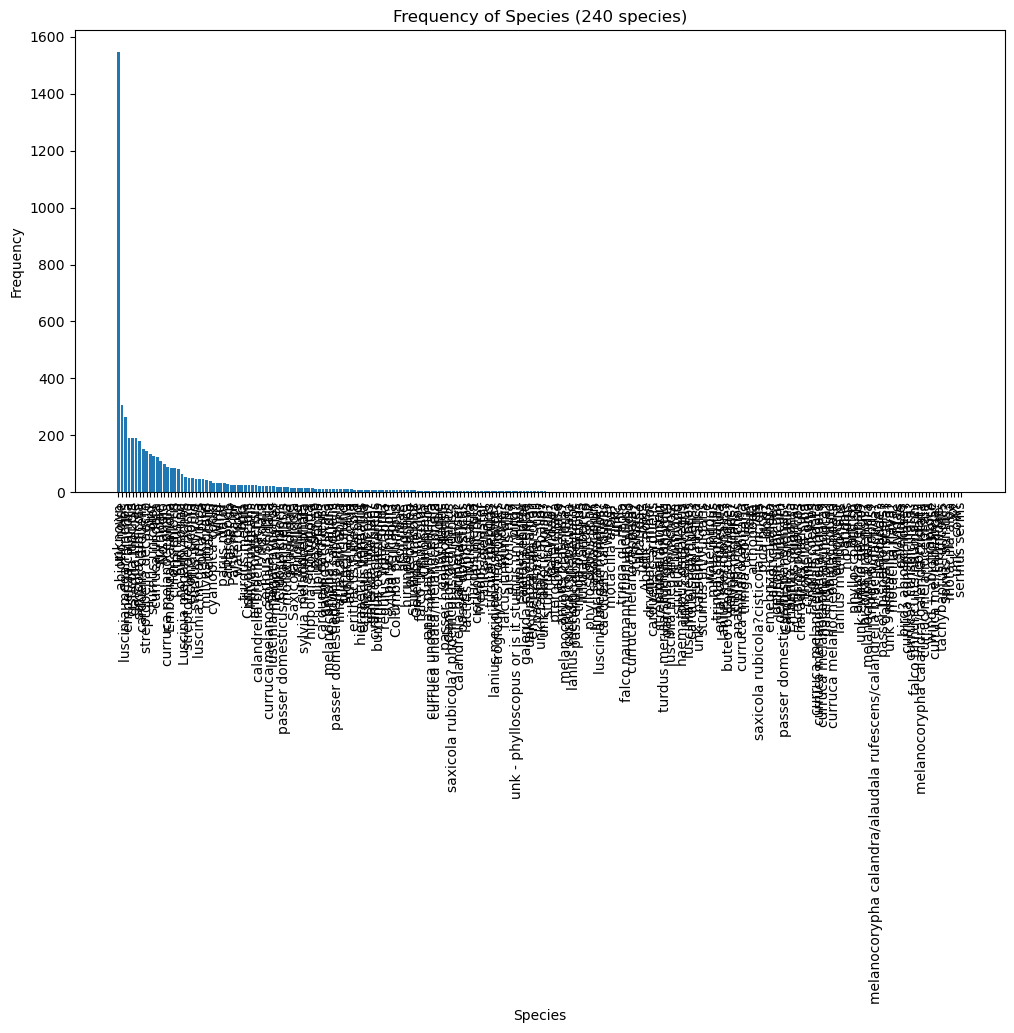

In [7]:
# Count the frequency of each species
species_counts = df['specie'].value_counts()

num_species = len(species_counts.index)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(species_counts.index, species_counts.values)
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Frequency of Species (' + str(num_species) + ' species)')
plt.xticks(rotation=90)
plt.show()

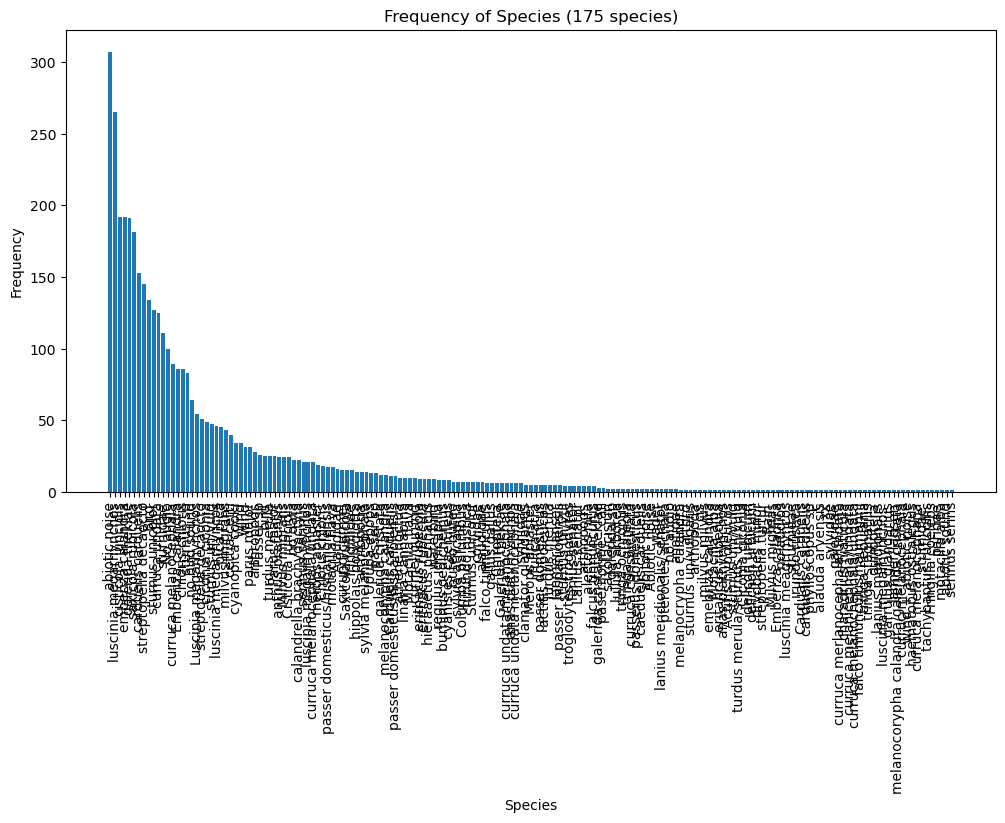

In [8]:
# Filter rows where 'specie' does not contain "Unk" or "?"
species_counts_non_Unknown = df[~(df['specie'].str.contains('Unk|Ubnk|\?', na=False, case = False))]['specie'].value_counts()

num_species = len(species_counts_non_Unknown.index)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(species_counts_non_Unknown.index, species_counts_non_Unknown.values)
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Frequency of Species (' + str(num_species) + ' species)')
plt.xticks(rotation=90)
plt.show()

## Distribution of Audio Duration

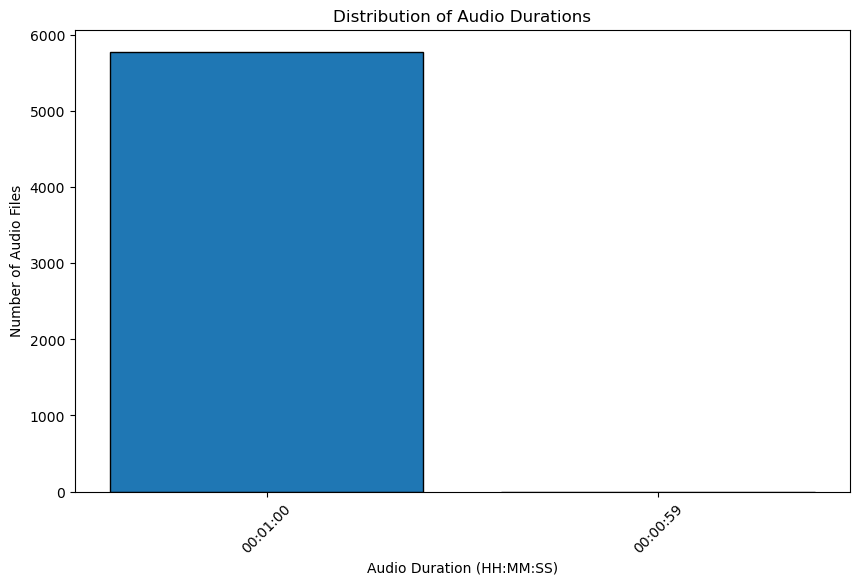

In [9]:
audio_duration_count = df['audio_duration'].value_counts()

# Plot a histogram of audio durations
plt.figure(figsize=(10, 6))
plt.bar(audio_duration_count.index, audio_duration_count.values, edgecolor='k')
plt.xlabel('Audio Duration (HH:MM:SS)')
plt.ylabel('Number of Audio Files')
plt.title('Distribution of Audio Durations')
plt.xticks(rotation=45)
plt.show()

## Time of recordings

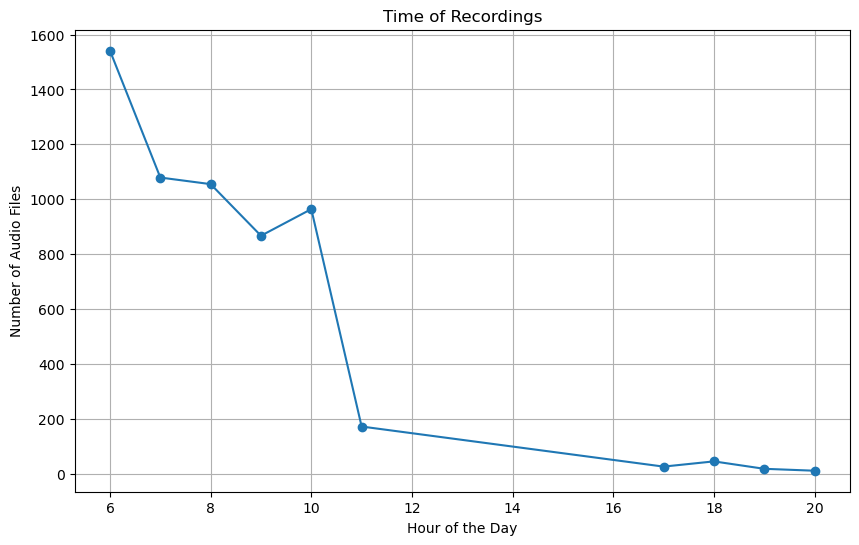

In [10]:
# Convert 'time' to a datetime object
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# Extract the hour of the day
df['hour'] = df['time'].dt.hour

# Count the number of audio files recorded at each hour
time_counts = df['hour'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(time_counts.index, time_counts.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Audio Files')
plt.title('Time of Recordings')
plt.grid(True)
plt.show()

## Date of recordings

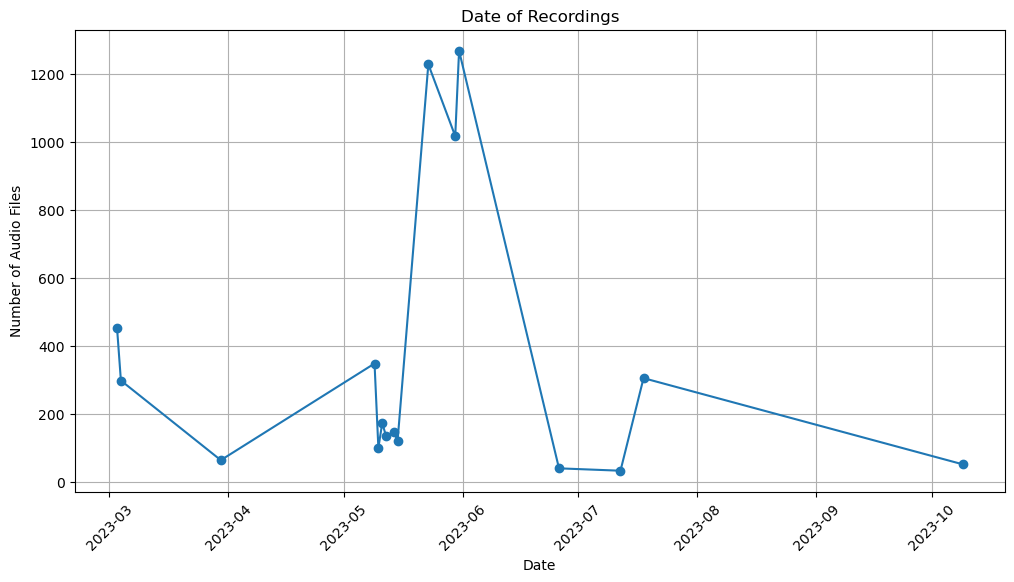

In [11]:
# Convert 'date' to a datetime object
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

# Extract the date without time
df['date_only'] = df['date'].dt.date

# Count the number of audio files recorded on each date
date_counts = df['date_only'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Audio Files')
plt.title('Date of Recordings')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


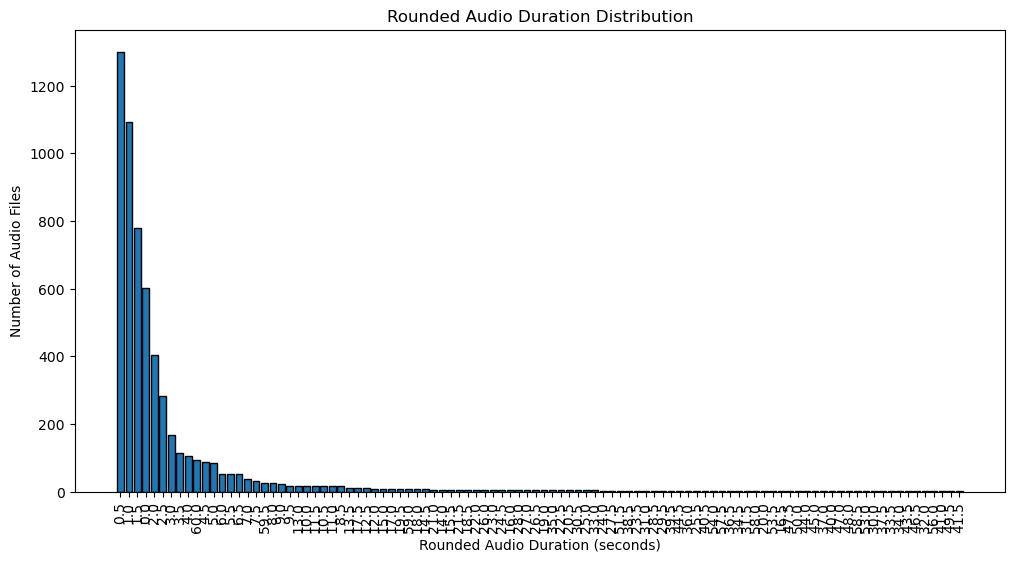

In [12]:
# Calculate the duration of each audio
df['duration'] = df['end_time'] - df['start_time']

# Round the duration to the nearest multiple of 0.5 seconds
df['rounded_duration'] = df['duration'].apply(lambda x: round(x * 2) / 2).astype(str)

# Count the occurrences of each rounded duration
duration_counts = df['rounded_duration'].value_counts()#.sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(duration_counts.index, duration_counts.values, edgecolor = "k")
plt.xlabel('Rounded Audio Duration (seconds)')
plt.ylabel('Number of Audio Files')
plt.title('Rounded Audio Duration Distribution')
plt.xticks(rotation=90)
plt.show()

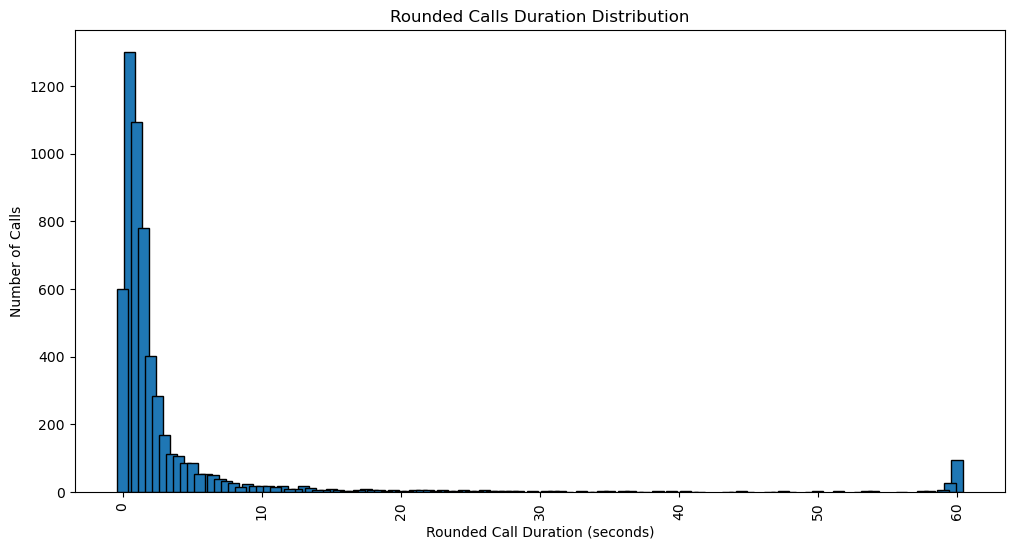

In [13]:
# Calculate the duration of each audio
df['duration'] = df['end_time'] - df['start_time']

# Round the duration to the nearest multiple of 0.5 seconds
df['rounded_duration'] = df['duration'].apply(lambda x: (round(x * 2) / 2))#.astype(str)

# Count the occurrences of each rounded duration
duration_counts = df['rounded_duration'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(duration_counts.index, duration_counts.values, edgecolor="k")
plt.xlabel('Rounded Call Duration (seconds)')
plt.ylabel('Number of Calls')
plt.title('Rounded Calls Duration Distribution')
plt.xticks(rotation=90)
plt.show()


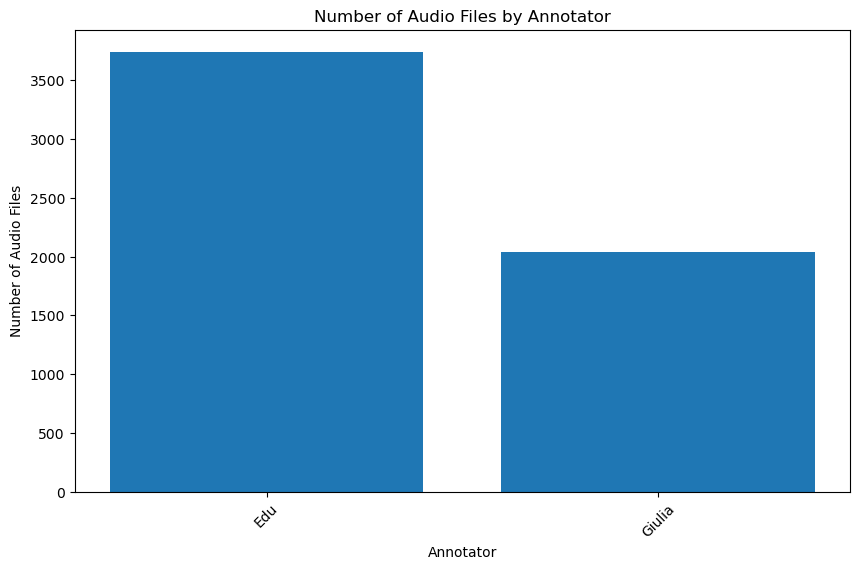

In [14]:
# Number os audios by annotator
annotator_counts = df['annotator'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(annotator_counts.index, annotator_counts.values)
plt.xlabel('Annotator')
plt.ylabel('Number of Audio Files')
plt.title('Number of Audio Files by Annotator')
plt.xticks(rotation=45)
plt.show()